In [138]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [139]:
import pandas as pd
df = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])


In [140]:
# Display the unified dataset
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df.describe()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,1882-12-15 23:02:15.338345984,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
min,1750-01-01 00:00:00,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,1816-06-23 12:00:00,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,1882-12-16 12:00:00,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,1949-06-08 12:00:00,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,2015-12-01 00:00:00,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000
std,NaN,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

In [143]:
print(df.isnull().sum())

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


In [144]:
df['dt'] = pd.to_datetime(df['dt'])


In [145]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [146]:
global_temperatures_df = df.dropna(subset=['LandAverageTemperature'])

# Check for missing values after handling them
print("Missing Values after handling:\n", global_temperatures_df.isnull().sum())


Missing Values after handling:
 dt                                              0
LandAverageTemperature                          0
LandAverageTemperatureUncertainty               0
LandMaxTemperature                           1188
LandMaxTemperatureUncertainty                1188
LandMinTemperature                           1188
LandMinTemperatureUncertainty                1188
LandAndOceanAverageTemperature               1188
LandAndOceanAverageTemperatureUncertainty    1188
dtype: int64


In [147]:
# Convert the 'dt' column to datetime format
global_temperatures_df['dt'] = pd.to_datetime(global_temperatures_df['dt'])

C:\Users\reddy\AppData\Local\Temp\ipykernel_46420\146690300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temperatures_df['dt'] = pd.to_datetime(global_temperatures_df['dt'])


In [148]:
global_temperatures_df .info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3180 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1), flo

In [149]:
global_temperatures_df.shape

(3180, 9)

In [150]:
global_aggregated = global_temperatures_df.resample('Y', on='dt').mean()


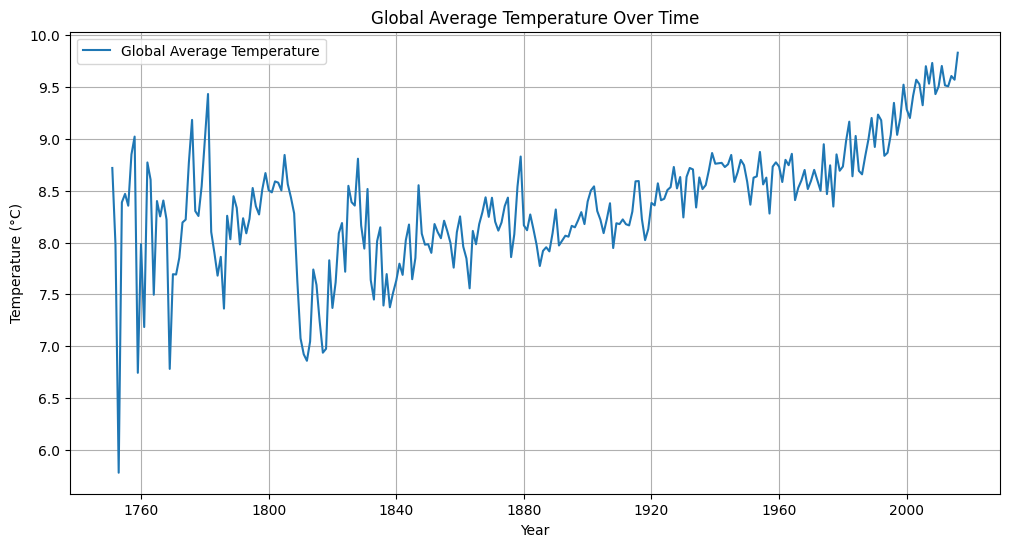

In [151]:
# Plot global temperature trends over time
plt.figure(figsize=(12, 6))
plt.plot(global_aggregated.index, global_aggregated['LandAverageTemperature'], label='Global Average Temperature')
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [152]:
# Calculate the z-score for the 'LandAverageTemperature'
z_scores = zscore(global_aggregated['LandAverageTemperature'])



In [153]:
# Define a z-score threshold for unusual changes (you can adjust this)
threshold = 2.0

# Identify unusual changes based on the z-score
unusual_changes = global_aggregated[abs(z_scores) > threshold]

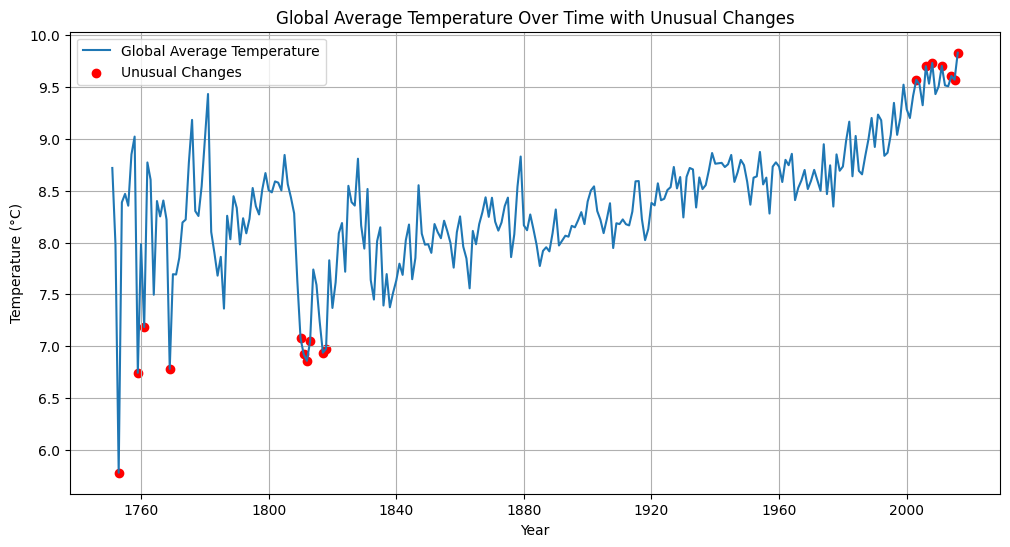

In [154]:
# Plot global temperature trends over time with unusual changes highlighted
plt.figure(figsize=(12, 6))
plt.plot(global_aggregated.index, global_aggregated['LandAverageTemperature'], label='Global Average Temperature')
plt.scatter(unusual_changes.index, unusual_changes['LandAverageTemperature'], color='red', label='Unusual Changes')
plt.title('Global Average Temperature Over Time with Unusual Changes')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
# Extract relevant features and target variable
features = global_temperatures_df[['LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMinTemperatureUncertainty']]
target = global_temperatures_df['LandAverageTemperature']


In [156]:
# Ensure that your dataset is sorted by the datetime column
global_temperatures_df = global_temperatures_df.sort_values('dt')

In [158]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(target.values.reshape(-1, 1))

In [159]:
# Define a function to create sequences for time series forecasting
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [160]:
# Define hyperparameters
sequence_length = 10  # Adjust based on the desired sequence length
batch_size = 32
epochs = 50

In [161]:
# Create sequences for training
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50


80/80 - 1s - loss: 0.0841 - val_loss: 0.0324 - 823ms/epoch - 10ms/step
Epoch 2/50
80/80 - 0s - loss: 0.0156 - val_loss: 0.0011 - 179ms/epoch - 2ms/step
Epoch 3/50
80/80 - 0s - loss: 0.0029 - val_loss: 0.0034 - 174ms/epoch - 2ms/step
Epoch 4/50
80/80 - 0s - loss: 0.0027 - val_loss: 0.0021 - 174ms/epoch - 2ms/step
Epoch 5/50
80/80 - 0s - loss: 0.0028 - val_loss: 0.0024 - 170ms/epoch - 2ms/step
Epoch 6/50
80/80 - 0s - loss: 0.0026 - val_loss: 0.0015 - 175ms/epoch - 2ms/step
Epoch 7/50
80/80 - 0s - loss: 0.0027 - val_loss: 0.0017 - 178ms/epoch - 2ms/step
Epoch 8/50
80/80 - 0s - loss: 0.0026 - val_loss: 0.0043 - 170ms/epoch - 2ms/step
Epoch 9/50
80/80 - 0s - loss: 0.0025 - val_loss: 0.0029 - 167ms/epoch - 2ms/step
Epoch 10/50
80/80 - 0s - loss: 0.0025 - val_loss: 0.0010 - 167ms/epoch - 2ms/step
Epoch 11/50
80/80 - 0s - loss: 0.0024 - val_loss: 0.0029 - 168ms/epoch - 2ms/step
Epoch 12/50
80/80 - 0s - loss: 0.0026 - val_loss: 0.0036 - 171ms/epoch - 2ms/step
Epoch 13/50
80/80 - 0s - loss: 0.00

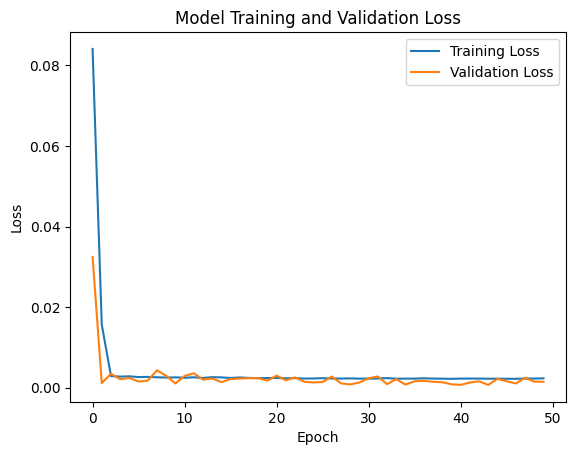

In [162]:
# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [164]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

20/20 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 0.6924842064312954
Root Mean Squared Error (RMSE): 0.8043819692150337
